# Edelweiss Machine Learning Hackathon


In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [45]:
RF_Final_Data = pd.read_csv('RF_Final_Data.csv')

In [46]:
RF_Final_Data.head()

,TicketId,Type,SubType,Status,Date,Preprocessed_EmailBody,Preprocessed_Subject,Masked_CustomerID,Masked_AgreementID
0,571910,REQUEST,PROVISIONAL IT CERTIFICATE,Close,2019-01-23 16:34:00,"hi team, can you please provide me itcertifica...",loan account number - loannumber,12020736,0
1,572747,REQUEST,SOA,Close,2019-01-24 16:05:00,hi team can you please arrange the certificate...,certificate of interest and principal for home...,12019080,0
2,4622,General,Others,Close,2016-02-12 13:40:00,NaN,re: repaysch : loan number loannumber,12004815,0
3,4674,REQUEST,SOA,Close,2016-02-12 15:41:00,"dear sir, you for your promptreply, please not...",re: finalit : loan number loannumber,12005158,11230237
4,4681,QUERY,CHANGEOFROI,Close,2016-02-12 15:55:00,"dear sachin, for your mail. this seems a great...",re: fw: repaysch : loan number loannumber,12001022,0


In [47]:
RF_Final_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7511 entries, 0 to 7510
Data columns (total 9 columns):
TicketId                  7511 non-null int64
Type                      7511 non-null object
SubType                   7511 non-null object
Status                    7511 non-null object
Date                      7511 non-null object
Preprocessed_EmailBody    7356 non-null object
Preprocessed_Subject      7328 non-null object
Masked_CustomerID         7511 non-null int64
Masked_AgreementID        7511 non-null int64
dtypes: int64(3), object(6)
memory usage: 528.2+ KB


In [48]:
RF_Final_Data['TicketId'].value_counts(ascending = False)[0:10]

485371    1
9598      1
85355     1
48493     1
451950    1
55065     1
267632    1
23921     1
17778     1
462195    1
Name: TicketId, dtype: int64

In [49]:
RF_Final_Data['Type'].value_counts(ascending = False)[0:100]

REQUEST        5865
QUERY          1502
COMPLAINT        94
General          29
Foreclosure       9
ROI               6
Unassigned        4
Request           2
Name: Type, dtype: int64

In [50]:
RF_Final_Data['SubType'].value_counts(ascending = False)[0:100]

FORECLOSURE                                       2027
CHANGEOFROI                                        968
SOA                                                836
Others                                             609
REPAYMENT SCHEDULE                                 374
TDSREIMBRELATED                                    368
LISTOFDOCS                                         361
COPYOFORIGDOCS                                     255
FINAL IT CERTIFICATE NONHL                         191
FINAL IT CERTIFICATE                               178
PREPAYEMICHNG                                      174
UPDATECONTACTDET                                   134
PROVISIONAL IT CERTIFICATE                         117
CHANGEREPAYMODE                                    109
EXCESS EMI REFUND                                  100
EMI NOT BANKED                                      90
DISBURSEMENT BREAK UP REQUIRED                      74
COMPLAINT                                           64
PREPAYTENO

In [51]:
RF_Final_Data['Status'].value_counts(ascending = False)[0:100]

Close       7245
Re-Open      156
Open          88
Rejected      22
Name: Status, dtype: int64

In [52]:
RF_Final_Data['Date'].value_counts(ascending = False)[0:100]

2018-10-08 00:00:00    16
2018-07-04 00:00:00    14
2018-04-24 13:16:00    14
2017-04-05 10:11:00    14
2017-03-13 00:00:00    12
2018-08-29 14:21:00    11
2018-08-29 14:18:00    11
2016-05-23 11:25:00    11
2018-07-16 00:00:00    11
2018-04-24 13:13:00    10
2017-01-04 00:00:00    10
2018-10-05 00:00:00     9
2018-07-30 00:00:00     9
2018-08-13 00:00:00     9
2017-05-02 10:00:00     9
2018-08-07 00:00:00     9
2017-11-27 11:00:00     9
2018-07-09 00:00:00     9
2018-04-24 13:14:00     8
2016-09-28 00:00:00     8
2016-07-25 10:35:00     8
2018-08-22 00:00:00     8
2018-07-24 00:00:00     8
2018-01-18 00:00:00     8
2018-01-19 00:00:00     8
2017-08-23 00:00:00     8
2017-03-06 00:00:00     7
2018-03-27 00:00:00     7
2018-04-24 13:15:00     7
2018-07-06 00:00:00     7
                       ..
2018-10-17 00:00:00     6
2018-02-13 00:00:00     6
2019-01-09 00:00:00     6
2018-03-07 00:00:00     6
2018-03-13 00:00:00     5
2018-01-16 00:00:00     5
2017-02-28 00:00:00     5
2017-03-10 0

In [53]:
RF_Final_Data['Masked_CustomerID'].value_counts(ascending = False)[0:160]

12009302    40
12003206    28
12007090    26
12001834    25
12002279    24
12001066    24
12008855    22
12009269    22
12016391    22
12004696    21
12006804    20
12003944    19
12002355    19
12010202    18
12007913    18
12009624    17
12004431    17
12006872    17
12007293    17
12002286    17
12006461    16
12002354    16
12003354    16
12005470    16
12001680    15
12003068    15
12008600    15
12003838    14
12007798    14
12005794    14
            ..
12009189     8
12012500     8
12011753     8
12001717     8
12005276     8
12005058     8
12006704     8
12002770     8
12005230     8
12005757     8
12003082     8
12005086     8
12002983     8
12028094     8
12007838     8
12009815     7
12007016     7
12001313     7
12007364     7
12003060     7
12005262     7
12006774     7
12001885     7
12008468     7
12010060     7
12004150     7
12008915     7
12005080     7
12009511     7
12002640     7
Name: Masked_CustomerID, Length: 160, dtype: int64

In [54]:
RF_Final_Data.loc[RF_Final_Data['Masked_CustomerID'] ==12009302]

,TicketId,Type,SubType,Status,Date,Preprocessed_EmailBody,Preprocessed_Subject,Masked_CustomerID,Masked_AgreementID
817,14241,QUERY,TDSREIMBRELATED,Close,2016-07-08 14:00:00,please confirm when the refunds are going to b...,tds refund overdue,12009302,0
952,16607,QUERY,TDSREIMBRELATED,Close,2016-08-03 00:00:00,please find attached the tds paid challan for ...,tds refund,12009302,0
1096,19381,QUERY,TDSREIMBRELATED,Close,2016-09-02 11:55:00,please find attached the tds paid challan for ...,tds paid challan,12009302,0
1100,19501,QUERY,TDSREIMBRELATED,Close,2016-09-04 13:10:00,"with reference to email below, please note tha...",re: tds paid challan,12009302,0
1132,20211,QUERY,CHANGEREPAYMODE,Close,2016-09-12 00:00:00,everything requested below has already been se...,re: re:[ticketid:rf99999]change of bank accoun...,12009302,0
1158,20816,QUERY,CHANGEREPAYMODE,Close,2016-09-19 00:00:00,still awaiting revert. been one week; kindly r...,re: request for reversals and loan statements,12009302,0
1369,26514,QUERY,TDSREIMBRELATED,Close,2016-11-03 00:00:00,please refund the tds deposited as per attache...,tds paid challan of ecl finance,12009302,0
1393,31299,QUERY,TDSREIMBRELATED,Close,2016-11-09 00:00:00,kindly process the tds refund as its still not...,fw: tds paid challan of ecl finance,12009302,0
1680,46112,QUERY,CHANGEOFROI,Close,2017-01-04 00:00:00,this is with reference to our two loans agains...,interest rate reduction,12009302,0
1710,46952,REQUEST,SOA,Close,2017-01-06 13:20:00,this is with reference to our two loans agains...,statement of account,12009302,0


In [55]:
def plot_box(df, numeric_variable):
    sns.boxplot(y=df[numeric_variable])
    #plt.yscale('log')
    #plt.ylim(5, 50)
    plt.title("Distribution of "+ numeric_variable)
    plt.show()

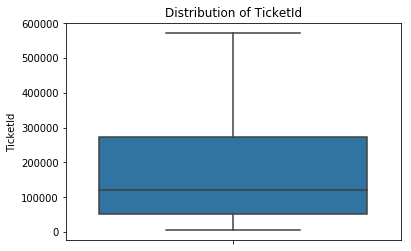

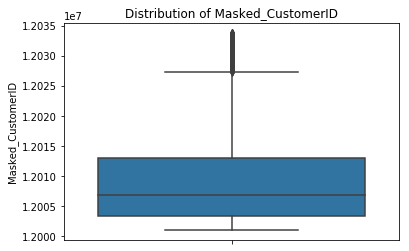

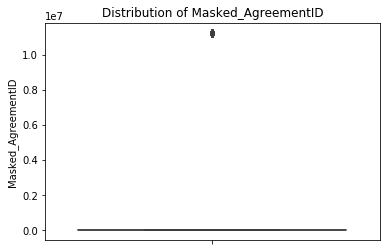

In [56]:
for numeric_variable in RF_Final_Data._get_numeric_data():
    plot_box(RF_Final_Data, numeric_variable)

In [57]:
LMS = pd.read_csv('LMS_31JAN2019.csv')

C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [58]:
LMS.head()

,AGREEMENTID,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,INTEREST_START_DATE,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,...,NET_LTV,COMPLETED_TENURE,BALANCE_TENURE,DPD,FOIR,PRODUCT,SCHEMEID,NPA_IN_LAST_MONTH,NPA_IN_CURRENT_MONTH,MOB
0,11220001,12001000.0,"1,17,10,107.24","1,17,10,107.24",30-Aug-10,13.7,10.6,58.0,120,1,...,40.06,39,19.0,0.0,0.6000,HL,10901100.0,NaN,NaN,39
1,11220002,12001001.0,"1,92,90,253.32","1,92,90,253.32",15-Sep-10,13.7,10.6,137.0,180,1,...,84.31,38,99.0,0.0,0.6000,HL,10901100.0,NaN,NaN,38
2,11220003,12001002.0,"40,53,498.66","40,53,498.66",06-Sep-10,17.2,12.5,360.0,180,5,...,79.34,38,322.0,0.0,0.9100,HL,10901101.0,NaN,NaN,38
3,11220004,12001003.0,"1,32,57,031.92","1,32,57,031.92",29-Sep-10,15.6,10.9,198.0,180,5,...,86.86,37,161.0,0.0,0.9686,HL,10901101.0,NaN,NaN,38
4,11220005,12001004.0,"1,32,11,403.04","1,32,11,403.04",06-Sep-10,16.5,11.9,142.0,180,5,...,40.93,38,104.0,0.0,0.7300,HL,10901101.0,NaN,NaN,38


In [59]:
LMS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624250 entries, 0 to 624249
Data columns (total 38 columns):
AGREEMENTID              624250 non-null int64
CUSTOMERID               623734 non-null float64
LOAN_AMT                 624250 non-null object
NET_DISBURSED_AMT        624250 non-null object
INTEREST_START_DATE      624250 non-null object
CURRENT_ROI              624250 non-null float64
ORIGNAL_ROI              624250 non-null float64
CURRENT_TENOR            624245 non-null float64
ORIGNAL_TENOR            624250 non-null int64
DUEDAY                   624250 non-null int64
AUTHORIZATIONDATE        624250 non-null object
CITY                     624242 non-null object
PRE_EMI_DUEAMT           624250 non-null float64
PRE_EMI_RECEIVED_AMT     624250 non-null float64
PRE_EMI_OS_AMOUNT        624250 non-null float64
EMI_DUEAMT               624250 non-null float64
EMI_RECEIVED_AMT         624250 non-null float64
EMI_OS_AMOUNT            624250 non-null float64
EXCESS_AVAILABLE  

In [60]:
LMS.rename(columns={"AGREEMENTID":"Agreement_ID", "CUSTOMERID":"Customer_ID", "LOAN_AMT":"Loan_Amt",
                   "NETDISBURSED_AMT":"Net_Disbursed_Amt", "INTEREST_START_DATE":"Interest_Start_Date",
                   "CURRENT_ROI":"Current_ROI", "ORIGNAL_ROI": "Original_ROI", "CURRENT_TENOR":"Current_Tenure",
                   "ORIGNAL_TENOR":"Original_Tenure", "DUEDAY":"Due_Day"}, inplace = True)

In [61]:
LMS.rename(columns={"AUTHORIZATIONDATE":"Authorization_Date","CITY":"City", "PRE_EMI_DUEAMT":"Pre_EMI_Due_Amt",
                   "PRE_EMI_RECEIVED_AMT":"Pre_EMI_Received_Amt", "PRE_EMI_OS_AMT":"Pre_EMI_OS_Amt",
                   "EMI_DUEAMT":"EMI_Due_Amt","EMI_RECEIVED_AMT":"EMI_Received_Amt","EMI_OS_AMT":"EMI_OS_Amt"},inplace  = True)

In [62]:

LMS.rename(columns = {"EXCESS_AVAILABLE":"Excess_Available", "EXCESS_ADJUSTED_AMT":"Excess_Adjusted_Amt"
                      ,"BALANCE_EXCESS":"Balance_Excess", "NET_RECEIVABLE":"Net_Receivable",
                      "OUTSTANDING_PRINCIPAL":"Outstanding_Principal", "PAID_PRINCIPAL":"Paid_Principal",
                      "PAID_INTEREST":"Paid_Interest", "MONTHOPENING":"Month_Opening",
                      "LAST_RECEIPT_DATE":"Last_Receipt_Date", "NET_LTV":"Net_LTV","COMPLETED_TENURE":"Completed_Tenure"
                      ,"BALANCE_TENURE":"Balance_Tenure","DPD":"DPD","FOIR":"FOIR", "PRODUCT":"Product"
                      , "SCHEMEID":"Scheme_ID", "NPA_IN_LAST_MONTH":"NPA_In_Last_Month", "NPA_IN_CURRENT_MONTH":"NPA_In_Current_Month"
                      ,"MOB":"MOB"}, inplace = True)

In [63]:
LMS.loc[LMS['Customer_ID'].isnull() == True]

,Agreement_ID,Customer_ID,Loan_Amt,NET_DISBURSED_AMT,Interest_Start_Date,Current_ROI,Original_ROI,Current_Tenure,Original_Tenure,Due_Day,...,Net_LTV,Completed_Tenure,Balance_Tenure,DPD,FOIR,Product,Scheme_ID,NPA_In_Last_Month,NPA_In_Current_Month,MOB
545787,11252411,NaN,"14,11,425.23","14,11,425.23",31-Oct-18,17.5,17.5,240.0,240,5,...,70.95,0,240.0,0.0,0.46,STHL,NaN,NaN,NaN,0
545788,11252412,NaN,"27,81,796.03","27,81,796.03",31-Oct-18,13.7,13.7,180.0,180,1,...,59.62,0,180.0,0.0,0.44,STLAP,NaN,NaN,NaN,0
570874,11252718,NaN,"12,01,036.64","12,01,036.64",30-Nov-18,13.7,13.7,144.0,144,5,...,23.50,0,144.0,0.0,0.51,LAP,NaN,NaN,NaN,0
570875,11252719,NaN,"37,27,544.82","37,27,544.82",23-Nov-18,13.4,13.4,240.0,240,5,...,87.23,0,240.0,0.0,0.50,STHL,NaN,NaN,NaN,0
570876,11252411,NaN,"14,11,425.23","14,11,425.23",31-Oct-18,17.5,17.5,240.0,240,5,...,70.95,0,240.0,0.0,0.46,STHL,NaN,NaN,NaN,1
570877,11252412,NaN,"27,81,796.03","27,81,796.03",31-Oct-18,13.7,13.7,180.0,180,1,...,59.62,1,179.0,0.0,0.44,STLAP,NaN,NaN,NaN,1
570878,11252720,NaN,"15,01,295.80","15,01,295.80",30-Nov-18,16.2,16.2,240.0,240,5,...,31.06,0,240.0,0.0,0.46,STHL,NaN,NaN,NaN,0
570879,11252721,NaN,"16,06,386.51","9,83,769.11",28-Nov-18,15.0,15.0,144.0,144,5,...,58.77,0,144.0,0.0,0.30,STHL,NaN,NaN,NaN,0
570880,11252722,NaN,"38,52,325.02","38,52,325.02",30-Nov-18,13.4,13.4,240.0,240,15,...,89.97,0,240.0,0.0,0.58,STHL,NaN,NaN,NaN,0
570881,11252723,NaN,"16,51,425.38","16,51,425.38",30-Nov-18,14.7,14.7,192.0,192,5,...,55.56,0,192.0,0.0,0.26,STHL,NaN,NaN,NaN,0


In [64]:


LMS['Customer_ID'] = LMS['Customer_ID'].fillna(0)

In [65]:
Train = pd.read_csv("train_foreclosure.csv")

In [66]:
Train.head()

,AGREEMENTID,FORECLOSURE
0,11220001,1
1,11220002,1
2,11220006,1
3,11220008,1
4,11220010,1


In [67]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20012 entries, 0 to 20011
Data columns (total 2 columns):
AGREEMENTID    20012 non-null int64
FORECLOSURE    20012 non-null int64
dtypes: int64(2)
memory usage: 312.8 KB


In [68]:
Train.rename(columns = {"AGREEMENTID":"Agreement_ID", "FORECLOSURE":"Foreclosure"}, inplace= True)

In [69]:
LMS['Customer_ID'] = LMS['Customer_ID'].astype(int)

In [70]:
Latest_LMS = LMS.groupby(['Customer_ID'], sort=False)['MOB'].max()

In [71]:
Latest_LMS = Latest_LMS.to_frame()

In [72]:
Latest_LMS.reset_index(level=0, inplace=True)

In [73]:
Latest_LMS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32896 entries, 0 to 32895
Data columns (total 2 columns):
Customer_ID    32896 non-null int64
MOB            32896 non-null int64
dtypes: int64(2)
memory usage: 514.1 KB


In [74]:
New_LMS  = pd.merge(Latest_LMS, LMS, on=['Customer_ID', 'MOB'], how='inner')

In [75]:
New_LMS.head()

,Customer_ID,MOB,Agreement_ID,Loan_Amt,NET_DISBURSED_AMT,Interest_Start_Date,Current_ROI,Original_ROI,Current_Tenure,Original_Tenure,...,LAST_RECEIPT_AMOUNT,Net_LTV,Completed_Tenure,Balance_Tenure,DPD,FOIR,Product,Scheme_ID,NPA_In_Last_Month,NPA_In_Current_Month
0,12001000,45,11220001,"1,17,10,107.24","1,17,10,107.24",30-Aug-10,13.4,10.6,45.0,120,...,1000000.0,40.06,45,0.0,0.0,0.6000,HL,10901100.0,NaN,NaN
1,12001001,38,11220002,"1,92,90,253.32","1,92,90,253.32",15-Sep-10,13.7,10.6,137.0,180,...,126530.0,84.31,38,99.0,0.0,0.6000,HL,10901100.0,NaN,NaN
2,12001002,87,11220003,"40,53,498.66","40,53,498.66",06-Sep-10,16.5,12.5,311.0,180,...,30898.0,79.34,87,224.0,0.0,0.9100,HL,10901101.0,NaN,NaN
3,12001003,38,11220004,"1,32,57,031.92","1,32,57,031.92",29-Sep-10,15.6,10.9,198.0,180,...,88256.0,86.86,37,161.0,0.0,0.9686,HL,10901101.0,NaN,NaN
4,12001004,46,11220005,"1,32,11,403.04","1,32,11,403.04",06-Sep-10,16.5,11.9,142.0,180,...,91892.0,40.93,46,96.0,0.0,0.7300,HL,10901101.0,NaN,NaN


In [76]:
New_LMS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32896 entries, 0 to 32895
Data columns (total 38 columns):
Customer_ID              32896 non-null int64
MOB                      32896 non-null int64
Agreement_ID             32896 non-null int64
Loan_Amt                 32896 non-null object
NET_DISBURSED_AMT        32896 non-null object
Interest_Start_Date      32896 non-null object
Current_ROI              32896 non-null float64
Original_ROI             32896 non-null float64
Current_Tenure           32896 non-null float64
Original_Tenure          32896 non-null int64
Due_Day                  32896 non-null int64
Authorization_Date       32896 non-null object
City                     32896 non-null object
Pre_EMI_Due_Amt          32896 non-null float64
Pre_EMI_Received_Amt     32896 non-null float64
PRE_EMI_OS_AMOUNT        32896 non-null float64
EMI_Due_Amt              32896 non-null float64
EMI_Received_Amt         32896 non-null float64
EMI_OS_AMOUNT            32896 non-null fl

In [77]:
Train = pd.merge(Train, New_LMS, on='Agreement_ID', how='inner')

In [78]:
Train.head()

,Agreement_ID,Foreclosure,Customer_ID,MOB,Loan_Amt,NET_DISBURSED_AMT,Interest_Start_Date,Current_ROI,Original_ROI,Current_Tenure,...,LAST_RECEIPT_AMOUNT,Net_LTV,Completed_Tenure,Balance_Tenure,DPD,FOIR,Product,Scheme_ID,NPA_In_Last_Month,NPA_In_Current_Month
0,11220001,1,12001000,45,"1,17,10,107.24","1,17,10,107.24",30-Aug-10,13.4,10.6,45.0,...,1000000.0,40.06,45,0.0,0.0,0.60,HL,10901100.0,NaN,NaN
1,11220002,1,12001001,38,"1,92,90,253.32","1,92,90,253.32",15-Sep-10,13.7,10.6,137.0,...,126530.0,84.31,38,99.0,0.0,0.60,HL,10901100.0,NaN,NaN
2,11220006,1,12001005,81,"39,33,395.00","39,33,395.00",01-Nov-10,15.6,11.5,312.0,...,22878.0,50.89,81,231.0,0.0,0.72,HL,10901101.0,NaN,NaN
3,11220008,1,12001007,91,"1,00,22,587.71","1,00,22,587.71",06-Oct-10,11.2,10.6,91.0,...,65741.0,84.63,91,0.0,0.0,0.60,HL,10901100.0,NaN,NaN
4,11220010,1,12001009,90,"77,55,937.31","77,55,937.31",26-Oct-10,15.0,10.9,304.0,...,54433.0,30.94,89,215.0,0.0,0.83,HL,10901101.0,NaN,NaN


In [79]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19731 entries, 0 to 19730
Data columns (total 39 columns):
Agreement_ID             19731 non-null int64
Foreclosure              19731 non-null int64
Customer_ID              19731 non-null int64
MOB                      19731 non-null int64
Loan_Amt                 19731 non-null object
NET_DISBURSED_AMT        19731 non-null object
Interest_Start_Date      19731 non-null object
Current_ROI              19731 non-null float64
Original_ROI             19731 non-null float64
Current_Tenure           19731 non-null float64
Original_Tenure          19731 non-null int64
Due_Day                  19731 non-null int64
Authorization_Date       19731 non-null object
City                     19731 non-null object
Pre_EMI_Due_Amt          19731 non-null float64
Pre_EMI_Received_Amt     19731 non-null float64
PRE_EMI_OS_AMOUNT        19731 non-null float64
EMI_Due_Amt              19731 non-null float64
EMI_Received_Amt         19731 non-null floa

In [80]:
Customer = pd.read_csv("Customers_31JAN2019.csv")

In [81]:
Customer.head()

,CUSTOMERID,CUST_CONSTTYPE_ID,CUST_CATEGORYID,PROFESSION,AGE,SEX,MARITAL_STATUS,QUALIFICATION,NO_OF_DEPENDENT,OCCUPATION,POSITION,GROSS_INCOME,PRE_JOBYEARS,NETTAKEHOMEINCOME,BRANCH_PINCODE
0,12001000,1,5,NaN,33.0,M,M,POSTGRAD,0.0,NaN,NaN,198375.2218,8.0,198375.2218,400070.0
1,12001001,1,5,NaN,44.0,M,M,POSTGRAD,0.0,NaN,NaN,242703.9829,10.0,242703.9829,400070.0
2,12001002,1,7,NaN,50.0,M,M,GRAD,0.0,NaN,NaN,0.0000,NaN,0.0000,400070.0
3,12001003,3,4,NaN,40.0,M,M,GRAD,0.0,NaN,NaN,365263.5116,NaN,365263.5161,400070.0
4,12001004,3,4,NaN,27.0,M,M,GRAD,0.0,NaN,NaN,187342.1990,NaN,187342.1990,400070.0


In [82]:
Customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
CUSTOMERID           10000 non-null int64
CUST_CONSTTYPE_ID    10000 non-null int64
CUST_CATEGORYID      10000 non-null int64
PROFESSION           0 non-null float64
AGE                  9604 non-null float64
SEX                  9606 non-null object
MARITAL_STATUS       9604 non-null object
QUALIFICATION        9596 non-null object
NO_OF_DEPENDENT      9921 non-null float64
OCCUPATION           0 non-null float64
POSITION             661 non-null object
GROSS_INCOME         10000 non-null float64
PRE_JOBYEARS         2375 non-null float64
NETTAKEHOMEINCOME    10000 non-null float64
BRANCH_PINCODE       9927 non-null float64
dtypes: float64(8), int64(3), object(4)
memory usage: 1.1+ MB


In [83]:
Customer = Customer.loc[:,['CUSTOMERID','CUST_CONSTTYPE_ID','CUST_CATEGORYID', 'AGE', 'SEX', 'MARITAL_STATUS', 'QUALIFICATION',
              'NO_OF_DEPENDENT', 'GROSS_INCOME', 'PRE_JOBYEARS','NETTAKEHOMEINCOME', 'BRANCH_PINCODE']]

In [84]:
Customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
CUSTOMERID           10000 non-null int64
CUST_CONSTTYPE_ID    10000 non-null int64
CUST_CATEGORYID      10000 non-null int64
AGE                  9604 non-null float64
SEX                  9606 non-null object
MARITAL_STATUS       9604 non-null object
QUALIFICATION        9596 non-null object
NO_OF_DEPENDENT      9921 non-null float64
GROSS_INCOME         10000 non-null float64
PRE_JOBYEARS         2375 non-null float64
NETTAKEHOMEINCOME    10000 non-null float64
BRANCH_PINCODE       9927 non-null float64
dtypes: float64(6), int64(3), object(3)
memory usage: 937.6+ KB


In [85]:
Customer.rename(columns = {"CUSTOMERID":"Customer_ID", "CUST_CONSTTYPE_ID":"Cust_Const_Type_ID",
                          "CUST_CATEGORYID":"Cust_Category_ID", "AGE":"Age", "SEX":"Gender", "MARITAL_STATUS":"Marital_Status"
                          ,"QUALIFICATION":"Qualification","NO_OF_DEPENDENT":"No_Of_Dependent", "GROSS_INCOME":"Gross_Income"
                          ,"PRE_JOBYEARS":"Pre_Job_Years", "NETTAKEHOMEINCOME":"Net_Take_Home_Income", 
                          "BRANCH_PINCODE":"Branch_Pincode"}, inplace = True)

In [86]:
Train = pd.merge(Train, Customer, on='Customer_ID', how='left')

In [87]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19731 entries, 0 to 19730
Data columns (total 50 columns):
Agreement_ID             19731 non-null int64
Foreclosure              19731 non-null int64
Customer_ID              19731 non-null int64
MOB                      19731 non-null int64
Loan_Amt                 19731 non-null object
NET_DISBURSED_AMT        19731 non-null object
Interest_Start_Date      19731 non-null object
Current_ROI              19731 non-null float64
Original_ROI             19731 non-null float64
Current_Tenure           19731 non-null float64
Original_Tenure          19731 non-null int64
Due_Day                  19731 non-null int64
Authorization_Date       19731 non-null object
City                     19731 non-null object
Pre_EMI_Due_Amt          19731 non-null float64
Pre_EMI_Received_Amt     19731 non-null float64
PRE_EMI_OS_AMOUNT        19731 non-null float64
EMI_Due_Amt              19731 non-null float64
EMI_Received_Amt         19731 non-null floa

In [88]:
Train.iloc[:10,:11]

,Agreement_ID,Foreclosure,Customer_ID,MOB,Loan_Amt,NET_DISBURSED_AMT,Interest_Start_Date,Current_ROI,Original_ROI,Current_Tenure,Original_Tenure
0,11220001,1,12001000,45,"1,17,10,107.24","1,17,10,107.24",30-Aug-10,13.4,10.6,45.0,120
1,11220002,1,12001001,38,"1,92,90,253.32","1,92,90,253.32",15-Sep-10,13.7,10.6,137.0,180
2,11220006,1,12001005,81,"39,33,395.00","39,33,395.00",01-Nov-10,15.6,11.5,312.0,180
3,11220008,1,12001007,91,"1,00,22,587.71","1,00,22,587.71",06-Oct-10,11.2,10.6,91.0,180
4,11220010,1,12001009,90,"77,55,937.31","77,55,937.31",26-Oct-10,15.0,10.9,304.0,180
5,11220011,0,12001010,98,"9,54,408.27","9,54,408.27",28-Oct-10,12.4,10.6,235.0,180
6,11220012,0,12001011,97,"66,05,701.52","66,05,701.52",19-Nov-10,16.2,10.9,390.0,300
7,11220014,1,12001013,52,"3,29,60,335.26","3,29,60,335.26",07-Dec-10,13.4,10.6,328.0,300
8,11220016,1,12001015,74,"84,07,256.48","84,07,256.48",21-Dec-10,12.8,10.6,217.0,216
9,11220017,0,12001016,97,"9,75,842.27","9,75,842.27",27-Nov-10,14.2,13.1,388.0,180


In [89]:
TrainX = Train['Loan_Amt'].apply((lambda x: x.replace(',',''))).astype(float)/100000

In [90]:
TrainX = TrainX.to_frame()

In [91]:
TrainX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19731 entries, 0 to 19730
Data columns (total 1 columns):
Loan_Amt    19731 non-null float64
dtypes: float64(1)
memory usage: 308.3 KB


In [92]:
TrainX.head()

,Loan_Amt
0,117.101072
1,192.902533
2,39.333950
3,100.225877
4,77.559373


In [93]:
TrainX['Loan_Amt'] = round(TrainX['Loan_Amt'],2)

In [94]:
TrainX.head()

,Loan_Amt
0,117.10
1,192.90
2,39.33
3,100.23
4,77.56


In [95]:
TrainX['Net_Disbursed_Amt'] = Train['NET_DISBURSED_AMT'].apply((lambda x: x.replace(',',''))).astype(float)/100000

In [96]:
TrainX['Net_Disbursed_Amt'] = round(TrainX['Net_Disbursed_Amt'],2)

In [97]:
TrainX['Loan_Disbursed_Ratio'] = TrainX['Loan_Amt']/TrainX['Net_Disbursed_Amt']

In [98]:
TrainX.loc[TrainX['Loan_Disbursed_Ratio'] < 1.0]

,Loan_Amt,Net_Disbursed_Amt,Loan_Disbursed_Ratio


In [99]:
TrainX['ROI_Change_Ratio'] =round ((Train['Original_ROI']-Train['Current_ROI'])/Train['Original_ROI'],2)

In [100]:
TrainX = TrainX.loc[:,['Net_Disbursed_Amt','ROI_Change_Ratio']]

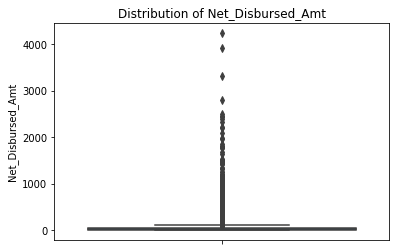

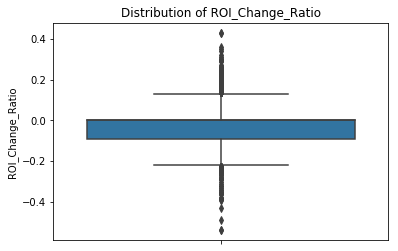

In [101]:
for numeric_variable in TrainX._get_numeric_data():
    plot_box(TrainX, numeric_variable)

In [102]:
TrainX.describe([.25,.5,.75,.80,.85,.90,.95,.97,.98,.99])

,Net_Disbursed_Amt,ROI_Change_Ratio
count,19731.000000,19731.000000
mean,58.930440,-0.031310
std,129.926908,0.065375
min,0.380000,-0.540000
25%,15.460000,-0.090000
50%,26.650000,0.000000
75%,52.550000,0.000000
80%,65.230000,0.000000
85%,81.985000,0.000000
90%,120.850000,0.000000


In [103]:
Train.iloc[:10,31:41]

,Completed_Tenure,Balance_Tenure,DPD,FOIR,Product,Scheme_ID,NPA_In_Last_Month,NPA_In_Current_Month,Cust_Const_Type_ID,Cust_Category_ID
0,45,0.0,0.0,0.60,HL,10901100.0,NaN,NaN,1.0,5.0
1,38,99.0,0.0,0.60,HL,10901100.0,NaN,NaN,1.0,5.0
2,81,231.0,0.0,0.72,HL,10901101.0,NaN,NaN,3.0,4.0
3,91,0.0,0.0,0.60,HL,10901100.0,NaN,NaN,1.0,5.0
4,89,215.0,0.0,0.83,HL,10901101.0,NaN,NaN,3.0,4.0
5,98,137.0,0.0,0.60,HL,10901100.0,NaN,NaN,1.0,5.0
6,96,294.0,56.0,0.55,HL,10901100.0,NaN,NaN,1.0,5.0
7,52,276.0,0.0,0.60,HL,10901100.0,NaN,NaN,1.0,5.0
8,72,145.0,0.0,0.60,HL,10901101.0,NaN,NaN,1.0,5.0
9,97,291.0,0.0,0.60,LAP,10901116.0,NaN,NaN,NaN,NaN


In [104]:
Train.to_csv("Train_merged.csv")

In [105]:
Train['City'].value_counts()[:10]

MUMBAI       2020
HYDERABAD    1553
SURAT        1384
AHMEDABAD    1378
PUNE         1194
CHENNAI       992
BANGALORE     865
THANE         721
DELHI         619
RAJKOT        545
Name: City, dtype: int64

In [106]:
Train['Net_LTV'].describe()

count    19731.000000
mean        50.980267
std         21.055915
min          0.380000
25%         35.000000
50%         53.040000
75%         66.550000
max        100.000000
Name: Net_LTV, dtype: float64

In [107]:
TrainX['Tenure_Ratio'] = round(Train['Completed_Tenure']/round(Train['Current_Tenure'],0),2)

In [108]:
TrainX.head(20)

,Net_Disbursed_Amt,ROI_Change_Ratio,Tenure_Ratio
0,117.10,-0.26,1.00
1,192.90,-0.29,0.28
2,39.33,-0.36,0.26
3,100.23,-0.06,1.00
4,77.56,-0.38,0.29
5,9.54,-0.17,0.42
6,66.06,-0.49,0.25
7,329.60,-0.26,0.16
8,84.07,-0.21,0.33
9,9.76,-0.08,0.25


In [109]:
Train.loc[:,['Current_Tenure','Original_Tenure','Completed_Tenure','Balance_Tenure']]

,Current_Tenure,Original_Tenure,Completed_Tenure,Balance_Tenure
0,45.0,120,45,0.0
1,137.0,180,38,99.0
2,312.0,180,81,231.0
3,91.0,180,91,0.0
4,304.0,180,89,215.0
5,235.0,180,98,137.0
6,390.0,300,96,294.0
7,328.0,300,52,276.0
8,217.0,216,72,145.0
9,388.0,180,97,291.0


In [110]:
TrainX['Tenure_Change_Ratio'] = round((Train['Original_Tenure']-Train['Current_Tenure'])
                                      /Train['Original_Tenure'],2)

In [111]:
TrainX['Foreclosure'] = Train['Foreclosure']

In [112]:
TrainX['Net_LTV']= Train['Net_LTV']

In [113]:
TrainX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19731 entries, 0 to 19730
Data columns (total 6 columns):
Net_Disbursed_Amt      19731 non-null float64
ROI_Change_Ratio       19731 non-null float64
Tenure_Ratio           19731 non-null float64
Tenure_Change_Ratio    19731 non-null float64
Foreclosure            19731 non-null int64
Net_LTV                19731 non-null float64
dtypes: float64(5), int64(1)
memory usage: 1.1 MB


In [114]:
TrainX.describe()

,Net_Disbursed_Amt,ROI_Change_Ratio,Tenure_Ratio,Tenure_Change_Ratio,Foreclosure,Net_LTV
count,19731.000000,19731.000000,19731.000000,19731.000000,19731.000000,19731.000000
mean,58.930440,-0.031310,0.114662,-0.034560,0.090974,50.980267
std,129.926908,0.065375,0.143104,0.165311,0.287579,21.055915
min,0.380000,-0.540000,0.000000,-1.830000,0.000000,0.380000
25%,15.460000,-0.090000,0.030000,-0.100000,0.000000,35.000000
50%,26.650000,0.000000,0.060000,0.000000,0.000000,53.040000
75%,52.550000,0.000000,0.150000,0.000000,0.000000,66.550000
max,4245.660000,0.430000,1.000000,0.980000,1.000000,100.000000


In [115]:
TrainX.to_csv("TrainX_Merged.csv")

In [259]:
TrainX['Agreement_ID'] = Train['Agreement_ID']

In [327]:
pre_std = TrainX[['Net_Disbursed_Amt','ROI_Change_Ratio', 'Tenure_Ratio','Tenure_Change_Ratio','Net_LTV']]

In [328]:
std_TrainX = (pre_std - pre_std.mean())/pre_std.std()

In [329]:
std_TrainX.head()

,Net_Disbursed_Amt,ROI_Change_Ratio,Tenure_Ratio,Tenure_Change_Ratio,Net_LTV
0,0.447710,-3.498133,6.186684,3.959571,-0.518632
1,1.031115,-3.957025,1.155373,1.660872,1.582915
2,-0.150857,-5.027774,1.015614,-4.206858,-0.004287
3,0.317868,-0.438852,6.186684,3.173174,1.598113
4,0.143385,-5.333702,1.225252,-3.964890,-0.951764


In [330]:
std_TrainX = pd.concat([std_TrainX,TrainX[['Agreement_ID', 'Foreclosure']]],axis = 1)

In [331]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [271]:
from sklearn.model_selection import train_test_split

In [332]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(std_TrainX[['Net_Disbursed_Amt','ROI_Change_Ratio', 'Tenure_Ratio','Tenure_Change_Ratio','Net_LTV']]
                                                    ,std_TrainX[['Agreement_ID','Foreclosure']]
                                                    , train_size=0.7,test_size=0.3,random_state=100)

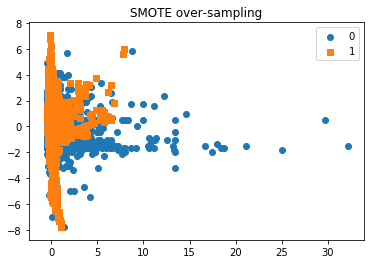

In [333]:
#!pip install imblearn
import imblearn
import numpy as np
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X_train,
                               y_train['Foreclosure'])

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

In [334]:
import statsmodels.api as sm
logm1 = sm.GLM(y_sm,(sm.add_constant(X_sm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                25178
Model:                            GLM   Df Residuals:                    25172
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -16246.
Date:                Fri, 05 Apr 2019   Deviance:                       32491.
Time:                        11:43:39   Pearson chi2:                 2.63e+04
No. Iterations:                     4                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1585      0.014    -11.605      0.000      -0.185      -0.132
x1             0.0205      0.016      1.283      0.199      -0.011       0.052
x2             0.4534      0.017     26.091      0.000       0.419       0.487
x3             0.2993      0.017     17.236      0.000       0.265       0.333
x4             0.1470      0.019      7.904      0.000       0.111       0.184
x5             0.0356      0.014      2.598      0.009       0.009       0.063
==============================================================================
"""

In [335]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [336]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(X_sm, y_sm)

C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [337]:
import pickle
# save the model to disk
filename = 'edelweiss_model.sav'
pickle.dump(logsk, open(filename, 'wb'))

In [338]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_test)

In [339]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [340]:
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

In [341]:
# Let's see the head
y_pred_1.describe()

,1
count,5920.000000
mean,0.461419
std,0.147125
min,0.046765
25%,0.331596
50%,0.481977
75%,0.525085
max,0.975361


In [342]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [343]:
y_test_df

,Agreement_ID,Foreclosure
2415,11224033,1
10213,11236953,0
15689,11246110,0
4977,11228281,0
12366,11240551,0
14127,11243475,0
19189,11251992,0
2977,11224978,0
16511,11247486,0
19500,11252514,0


In [344]:
# Putting CustID to index
y_test_df['Agreement_ID'] = y_test_df.index

In [345]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [346]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

In [347]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Foreclosure_Prob'})

In [348]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Agreement_ID','Foreclosure','Foreclosure_Prob'], axis=1)

In [349]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Foreclosure_Prob.map( lambda x: 1 if x > 0.5 else 0)

In [350]:
# Let's see the head of y_pred_final
y_pred_final.tail(200)

,Agreement_ID,Foreclosure,Foreclosure_Prob,predicted
5720,16590,0,0.475334,0
5721,10726,0,0.498517,0
5722,12524,0,0.489054,0
5723,10264,0,0.507787,1
5724,1696,0,0.515567,1
5725,14442,0,0.221112,0
5726,10435,0,0.510218,1
5727,7584,0,0.446088,0
5728,4527,1,0.798599,1
5729,14353,0,0.485102,0


In [351]:
from sklearn import metrics

In [352]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.Foreclosure, y_pred_final.predicted )
confusion

array([[3598, 1749],
       [ 207,  366]], dtype=int64)

In [353]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.Foreclosure, y_pred_final.predicted)

0.6695945945945946

In [354]:
TP = confusion[0,0] # true positive 
TN = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [355]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9455978975032852

In [356]:
# Let us calculate specificity
TN / float(TN+FP)

0.17304964539007092

In [357]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.826950354609929


In [358]:
print(FN/float(TN+FP))

0.09787234042553192


In [359]:
# positive predictive value 
print (TP / float(TP+FP))

0.6729006919768095


In [360]:
# Negative predictive value
print (TN / float(TN+ FN))

0.6387434554973822


In [361]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

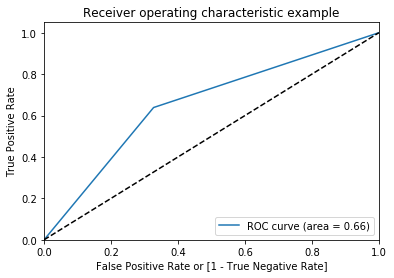

(array([0.        , 0.32709931, 1.        ]),
 array([0.        , 0.63874346, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [362]:
draw_roc(y_pred_final.Foreclosure, y_pred_final.predicted)

In [363]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Foreclosure_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,Agreement_ID,Foreclosure,Foreclosure_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,2415,1,0.660187,1,1,1,1,1,1,1,1,0,0,0
1,10213,0,0.506110,1,1,1,1,1,1,1,0,0,0,0
2,15689,0,0.486569,0,1,1,1,1,1,0,0,0,0,0
3,4977,0,0.561164,1,1,1,1,1,1,1,0,0,0,0
4,12366,0,0.167430,0,1,1,0,0,0,0,0,0,0,0


In [364]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.Foreclosure, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.096791  0.000000  1.000000
0.1   0.1  0.096791  0.000561  0.994764
0.2   0.2  0.104730  0.010099  0.987784
0.3   0.3  0.299831  0.229287  0.958115
0.4   0.4  0.358615  0.302600  0.881326
0.5   0.5  0.669595  0.672901  0.638743
0.6   0.6  0.831081  0.896578  0.219895
0.7   0.7  0.867736  0.948382  0.115183
0.8   0.8  0.886655  0.974752  0.064572
0.9   0.9  0.899662  0.993828  0.020942


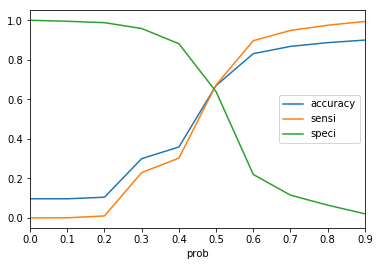

In [365]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [366]:
y_pred_final['final_predicted'] = y_pred_final.Foreclosure_Prob.map( lambda x: 1 if x > 0.5 else 0)

In [367]:
y_pred_final.head()

,Agreement_ID,Foreclosure,Foreclosure_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,2415,1,0.660187,1,1,1,1,1,1,1,1,0,0,0,1
1,10213,0,0.506110,1,1,1,1,1,1,1,0,0,0,0,1
2,15689,0,0.486569,0,1,1,1,1,1,0,0,0,0,0,0
3,4977,0,0.561164,1,1,1,1,1,1,1,0,0,0,0,1
4,12366,0,0.167430,0,1,1,0,0,0,0,0,0,0,0,0


In [368]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.Foreclosure, y_pred_final.final_predicted)

0.6695945945945946

In [369]:
metrics.confusion_matrix( y_pred_final.Foreclosure, y_pred_final.final_predicted )

array([[3598, 1749],
       [ 207,  366]], dtype=int64)